In [52]:
import os

import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('talk')

%matplotlib inline

In [5]:
files

['appended_data_naive_1.csv',
 'appended_data_naive_128.csv',
 'appended_data_naive_16.csv',
 'appended_data_naive_2.csv',
 'appended_data_naive_256.csv',
 'appended_data_naive_32.csv',
 'appended_data_naive_4.csv',
 'appended_data_naive_64.csv',
 'appended_data_naive_8.csv',
 'appended_data_smart_1.csv',
 'appended_data_smart_128.csv',
 'appended_data_smart_16.csv',
 'appended_data_smart_2.csv',
 'appended_data_smart_256.csv',
 'appended_data_smart_32.csv',
 'appended_data_smart_4.csv',
 'appended_data_smart_64.csv',
 'appended_data_smart_8.csv']

In [6]:
files = os.listdir('./results')
d0 = pd.read_csv('./results/' + files[0])

D = d0.loc[
    :, 
    ['subject', 'color', 'bp', 'wp', 'response', 'rt', 'splitg', 'n_pieces']
]

D = D.copy()

names = [f[14:-4] for f in files]

for f in files:
    _d = pd.read_csv('./results/' + f)
    D.loc[:, f[14:-4]] = _d.cnn_nll.values
    
D.head()

,subject,color,bp,wp,response,rt,splitg,n_pieces,naive_1,naive_128,...,naive_8,smart_1,smart_128,smart_16,smart_2,smart_256,smart_32,smart_4,smart_64,smart_8
0,0,0,000000000000000000000000000000000000,000000000000000000000000000000000000,11,7223,5,0,3.516745,4.128196,...,3.884012,3.546878,4.156188,4.037173,3.698342,4.186132,4.094836,4.019267,4.143282,3.887828
1,1,1,000000000000000000000000000000000000,000000000001000000000000000000000000,24,5141,5,1,3.588722,4.244206,...,4.161124,3.568749,4.443789,4.488919,3.894595,4.552783,4.360919,4.377874,4.266925,4.397906
2,0,0,000000000001000000000000000000000000,000000000000000000000000100000000000,21,3154,5,2,2.761279,2.656283,...,2.714588,2.712107,2.702742,2.805940,2.631602,2.804832,2.510506,2.553612,2.656333,2.450614
3,1,1,000000000000000000000000100000000000,000000000001000000000100000000000000,31,5715,4,3,2.744632,0.757582,...,2.663838,2.962218,0.889912,1.549567,2.885014,0.762685,1.037952,2.643039,0.903978,2.191686
4,0,0,000000000001000000000100000000000000,000000000000000000000000100000010000,14,6837,3,4,2.631289,3.979000,...,3.255823,2.811628,4.013144,3.200343,2.605702,4.114066,3.300314,3.008024,3.583677,3.317387


In [38]:
levels = 2**np.arange(9)
types = ['smart', 'naive']
m_smart, m_naive, l_smart, l_naive, u_smart, u_naive = [np.zeros(9) for _ in range(6)]

for name in names:
    n = np.log2(int(name[6:]))
    if name[:5]=='naive':
        m, l, u = m_naive, l_naive, u_naive
    else:
        m, l, u = m_smart, l_smart, u_smart
    
    mstats, _, _ = sts.bayes_mvs(D.loc[:, name].values)
    m[n] = mstats[0]
    l[n] = mstats[1][0]
    u[n] = mstats[1][1]

/Users/gianni/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/gianni/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/gianni/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Is 32 filters significantly better than 16?
 Ttest_indResult(statistic=2.824811767905997, pvalue=0.0047393843761417325)
Is 64 better than 32?
 Ttest_indResult(statistic=0.2794634170172306, pvalue=0.77989448143014772)
Just to check, is smart 32 better than naive 32?
 Ttest_indResult(statistic=-4.8114314251573074, pvalue=1.5185083975927674e-06)
It is official: best CNN is 32 filter with rule knowledge


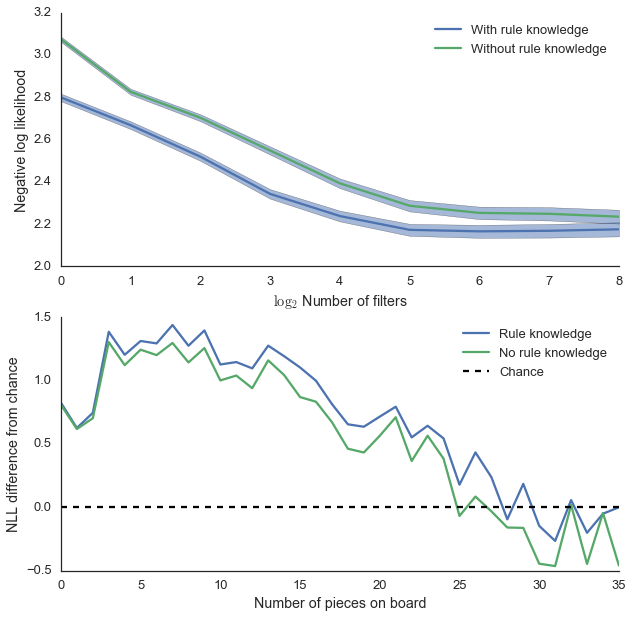

In [97]:
print(
    'Is 32 filters significantly better than 16?\n', 
    sts.ttest_ind(D.smart_16.values, D.smart_32.values)
)

print(
    'Is 64 better than 32?\n',
    sts.ttest_ind(D.smart_32.values, D.smart_64.values)
)

print(
    'Just to check, is smart 32 better than naive 32?\n',
    sts.ttest_ind(D.smart_32.values, D.naive_32.values)
)

print(
    'It is official: best CNN is 32 filter with rule knowledge'
)

fig, axes = plt.subplots(2, 1, figsize=(10, 10), squeeze=False)

trends = axes[0, 0]
per_piece = axes[1, 0]

trends.plot(np.arange(9), m_smart, label='With rule knowledge')
trends.fill_between(np.arange(9), l_smart, u_smart, zorder=0, alpha=.5)

trends.plot(np.arange(9), m_naive, label='Without rule knowledge')
trends.fill_between(np.arange(9), l_naive, u_naive, zorder=1, alpha=.5)

plt.setp(trends, xlabel=r'$\log_2{}$ Number of filters', ylabel='Negative log likelihood')

trends.legend()

_D = D.pivot_table(
    index='n_pieces', 
    values=['smart_32', 'naive_32'], 
    aggfunc=np.mean
)

_D.loc[:, :] = -_D.values - np.log(1/np.arange(1, 37)[::-1])[:, np.newaxis]

per_piece.plot(_D.smart_32, label='Rule knowledge')
per_piece.plot(_D.naive_32, label='No rule knowledge')
per_piece.plot([0, 35], [0, 0], linestyle='--', label='Chance', color='black')
per_piece.legend()

plt.setp(
    per_piece, 
    xlabel='Number of pieces on board', 
    ylabel='NLL difference from chance'
)

sns.despine()
fig.savefig('./results/trends.png')

In [74]:
_D = D.pivot_table(index='n_pieces', values=['smart_32', 'naive_32'], aggfunc=np.mean)
_D

,naive_32,smart_32
n_pieces,,
0,2.775612,2.758659
1,2.938109,2.930104
2,2.823906,2.781430
3,2.193919,2.112688
4,2.344716,2.263241
5,2.191198,2.122652
6,2.201119,2.108880
7,2.071726,1.929920
8,2.189768,2.058303
